In [3]:
import importlib
import utilize.transform as transform
import utilize.test as test
import utilize.model as model
importlib.reload(transform)
importlib.reload(test)
importlib.reload(model)

<module 'utilize.model' from '/Users/sk49226/Desktop/datamining/jupyter/extrasensory_Xu/utilize/model.py'>

In [4]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from utilize.data import *
from utilize.transform import *
from utilize.feature_selection import *
from utilize.test import *
from utilize.model import *

Found 60 users data.


In [5]:
 X, y, M, user_index, feature_names, label_names = load_all_data()

In [6]:
# Only select body state label
target_label = ['LYING_DOWN', 'SITTING', 'FIX_walking', 'FIX_running', 'BICYCLING', 'OR_standing']

# Use the last 5 user's data as test set
test_uuid = list(range(56, 61))

# Fill the Nan with mean value and normalize all the data 
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('std_scaler', StandardScaler())
])

In [7]:
# Transform 
# 1. select target labels 
# 2. tansform feature matrix fill None with mean and do the normalization
# 3. Split train, validation and test set by ratio of 6:2:2
X_new, y_new, M_new = select_target_labels(X, y, M, target_label, label_names, drop_all_zero = False)
X_new = pipeline.fit_transform(X_new, y_new)
X_train, y_train, M_train, X_val, y_val, M_val, X_test, y_test, M_test = random_split(X_new, y_new, M_new, test_size = 0.2, val_size = 0.2, random_seed = 42)

In [8]:
X_train.shape

(226408, 225)

In [ ]:
#make dataframe which can store value for each hyper parameter
hyperpara = pd.DataFrame({
    'dropout1':[], 'dropout2':[], 'batchnorm1':[], 'batchnorm2':[],'alpha':[], 'BA':[], 'node':[]})

for dropout1 in [0]:
    dropout2 = dropout1
    for batchnorm1 in ['On','Off']:
        batchnorm2 = batchnorm1
        for alpha in [0]:
            for node in [16,32,64,128,256,512,1024,2048]:
                mlp = MLP_model([node, node], target_label, epoches = 40, learning_rate = 0.00005, 
                                dropout1 =dropout1, dropout2 =dropout2, 
                                batchnorm1 = batchnorm1, batchnorm2 = batchnorm2, 
                                alpha = alpha)
                mlp.fit(X_train, y_train, M_train= M_train)

                #save the result of fit at each learning rate and regularization constant in hyperpara so that we can draw plot
                hyperpara = hyperpara.append({'dropout1':dropout1, 
                                              'dropout2':dropout2, 
                                              'batchnorm1':batchnorm1, 
                                              'batchnorm2':batchnorm2,
                                              'alpha':alpha,
                                              'node':node,
                                              'BA':mlp.score(X_val, y_val, M = M_val)}, 
                                             ignore_index=True)

accuaracy      sensitivity    specificity    BA             
0.800552       0.891028       0.776594       0.833811       
accuaracy      sensitivity    specificity    BA             
0.838040       0.886817       0.826660       0.856738       
accuaracy      sensitivity    specificity    BA             
0.852115       0.903028       0.830367       0.866698       
accuaracy      sensitivity    specificity    BA             
0.877962       0.904668       0.877248       0.890958       
accuaracy      sensitivity    specificity    BA             
0.901246       0.881474       0.904892       0.893183       
accuaracy      sensitivity    specificity    BA             
0.907735       0.910338       0.891410       0.900874       
accuaracy      sensitivity    specificity    BA             
0.888878       0.911481       0.884753       0.898117       
accuaracy      sensitivity    specificity    BA             
0.840490       0.916146       0.818664       0.867405       
accuaracy      sensitivi

In [ ]:
# show lowest score among each parameter

hyperpara.sort_values(by = 'BA',ascending=False).head(20)


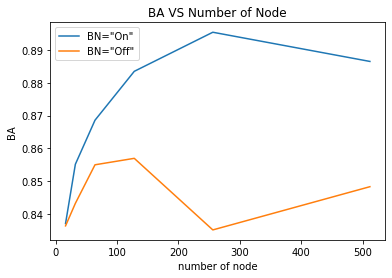

In [53]:

on = [0.837008,0.855129,0.868607,0.883555, 0.895510,0.88658]
off =[0.836285,0.843168,0.854968,0.856942,0.835049,0.84827]
plt.plot( [16,32,64,128,256,512],on, [16,32,64,128,256,512],off)
plt.legend(['BN="On"', 'BN="Off"'])
plt.title('BA VS Number of Node')
plt.xlabel('number of node')
plt.ylabel('BA')
plt.show()

In [9]:
#make dataframe which can store value for each hyper parameter
hyperpara = pd.DataFrame({'dropout1':[], 'dropout2':[], 'batchnorm1':[], 'batchnorm2':[],'alpha':[], 'BA':[]})

for dropout1 in [0, 0.15]:
    dropout2 = dropout1
    for batchnorm1 in ['Off', 'On']:
        batchnorm2 = batchnorm1
        # for each drop out1,
        for alpha in [0, 0.1, 0.01]:
            mlp = MLP_model([16, 16], target_label, epoches = 40, learning_rate = 0.00005, dropout1 =dropout1, dropout2 =dropout2, batchnorm1 = batchnorm1, batchnorm2 = batchnorm2, alpha = alpha)
            mlp.fit(X_train, y_train, M_train= M_train)
            #save the result of fit at each learning rate and regularization constant in hyperpara so that we can draw plot
            hyperpara = hyperpara.append({'dropout1':dropout1, 'dropout2':dropout2, 'batchnorm1':batchnorm1, 'batchnorm2':batchnorm2,'alpha':alpha, 'BA':mlp.score(X_val, y_val, M = M_val)}, ignore_index=True)

accuaracy      sensitivity    specificity    BA             
0.841792       0.863849       0.823620       0.843735       
accuaracy      sensitivity    specificity    BA             
0.797921       0.894581       0.769912       0.832246       
accuaracy      sensitivity    specificity    BA             
0.789021       0.899209       0.767066       0.833138       


RuntimeError: running_mean should contain 16 elements not 64

In [ ]:
# show lowest score among each parameter

hyperpara.sort_values(by = 'BA',ascending=False).head(20)


In [84]:
#make dataframe which can store value for each hyper parameter
hyperpara = pd.DataFrame({'dropout1':[], 'dropout2':[], 'batchnorm1':[], 'batchnorm2':[],'alpha':[], 'BA':[]})

for dropout1 in [0]:
    # for each drop out1,
    for dropout2 in [0]:
        # for each drop out1,
        for batchnorm1 in ['Off']:
            for batchnorm2 in ['Off']:
                for alpha in [0]:
                    mlp = MLP_model([16, 16], target_label, epoches = 20, learning_rate = 0.00005, dropout1 =dropout1, dropout2 =dropout2, batchnorm1 = batchnorm1, batchnorm2 = batchnorm2, alpha = alpha)
                    mlp.fit(X_train, y_train, X_val, y_val, M_train, M_val, report = True)
                  
                    
                    #save the result of fit at each learning rate and regularization constant in hyperpara so that we can draw plot
                    hyperpara = hyperpara.append({'dropout1':dropout1, 'dropout2':dropout2, 'batchnorm1':batchnorm1, 'batchnorm2':batchnorm2,'alpha':alpha, 'BA':mlp.score(X_val, y_val, M = M_val)}, ignore_index=True)

Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.561916
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.443748
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.594758
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.478733
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.421169
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.490926
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.601498
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.604858       0.861192       0.551471       0.706331       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.467860
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.406469
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.375870
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.414000
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.556522
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.531013
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.326037
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.724007       0.875200       0.699994       0.787597       
Train 

Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.270759
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.260155
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.251084
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.793828       0.893610       0.771937       0.832773       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.281599
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.334434
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.337322
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.267901
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.338345
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.264184
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.285883
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.817709       0.872395       0.799939       0.836167       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.270950
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.273689
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.231261
Train Epoch: 18 [119700/226408 (52%)]	Loss:

In [85]:
# show lowest score among each parameter

hyperpara.sort_values(by = 'BA',ascending=False).head(20)


,dropout1,dropout2,batchnorm1,batchnorm2,alpha,BA
0,0.0,0.0,Off,Off,0.0,0.835137


In [76]:
#make dataframe which can store value for each hyper parameter
hyperpara = pd.DataFrame({'dropout1':[], 'dropout2':[], 'batchnorm1':[], 'batchnorm2':[],'alpha':[], 'BA':[]})

for dropout1 in [0.5,0.3, 0.7]:
    # for each drop out1,
    for dropout2 in [0.5,0.3, 0.7]:
        # for each drop out1,
        for batchnorm1 in ['Off','On']:
            for batchnorm2 in ['Off','On']:
                for alpha in [0.0001, 0.001, 0.01]:
                    mlp = MLP_model([16, 16], target_label, epoches = 20, learning_rate = 0.00005, dropout1 =dropout1, dropout2 =dropout2, batchnorm1 = batchnorm1, batchnorm2 = batchnorm2, alpha = alpha)
                    mlp.fit(X_train, y_train, X_val, y_val, M_train, M_val, report = True)
                  
                    
                    #save the result of fit at each learning rate and regularization constant in hyperpara so that we can draw plot
                    hyperpara = hyperpara.append({'dropout1':dropout1, 'dropout2':dropout2, 'batchnorm1':batchnorm1, 'batchnorm2':batchnorm2,'alpha':alpha, 'BA':mlp.score(X_val, y_val, M = M_val)}, ignore_index=True)

Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.503410
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.526534
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.524616
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.580529
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.474038
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.455956
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.487359
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.514510       0.855278       0.452421       0.653849       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.438914
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.553627
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.406601
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.434037
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.424297
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.448452
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.576872
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.581427       0.872562       0.529466       0.701014       
Train 

Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.326789
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.394182
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.422737
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.701397       0.876464       0.665777       0.771121       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.417907
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.430466
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.392787
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.341263
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.329529
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.327997
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.374144
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.693008       0.880087       0.658415       0.769251       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.322197
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.436845
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.352782
Train Epoch: 18 [119700/226408 (52%)]	Loss:

Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.415988
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.659089       0.902401       0.619455       0.760928       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.371512
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.357438
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.354704
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.390739
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.378465
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.452128
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.409290
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.669170       0.893857       0.630127       0.761992       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.369522
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.367350
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.349541
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.312139
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.325790
Train Epoch: 14 [179700/226408 (79%)]	Loss:

accuaracy      sensitivity    specificity    BA             
0.658215       0.888094       0.621256       0.754675       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.422562
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.457641
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.467464
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.459073
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.340246
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.442203
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.372919
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.658797       0.891339       0.619155       0.755247       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.338797
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.432888
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.382723
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.377386
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.333301
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.350858
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.381867
Test epoch 10

Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.327131
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.360186
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.533910
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.415842
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.385046
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.390721
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.397925
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.641932       0.890584       0.597365       0.743975       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.346109
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.412457
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.421125
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.340144
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.346598
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.488905
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.393703
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.662031       0.881175       0.621085       0.751130       
Train 

Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.468068
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.459273
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.397180
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.533276
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.389145
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.382905
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.586137       0.883994       0.529595       0.706794       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.430693
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.413359
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.408725
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.395768
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.389650
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.421010
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.400477
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.602027       0.887632       0.550001       0.718816       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.415080
Train 

Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.390798
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.416189
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.652693       0.890127       0.618117       0.754122       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.344562
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.557359
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.346569
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.360237
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.388994
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.379784
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.378475
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.656995       0.893751       0.620412       0.757081       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.361116
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.439807
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.395632
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.314666
Train Epoch: 19 [149700/226408 (66%)]	Loss:

accuaracy      sensitivity    specificity    BA             
0.690426       0.876194       0.662526       0.769360       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.376958
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.417413
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.439913
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.356385
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.367836
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.388509
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.357169
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.691529       0.869941       0.662695       0.766318       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.385594
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.370965
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.363598
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.366087
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.412217
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.590368
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.355737
Test 

Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.314907
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.418021
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.371489
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.444081
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.374502
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.341252
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.317882
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.651372       0.907551       0.605905       0.756728       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.367514
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.410066
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.431652
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.411358
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.367142
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.373350
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.387438
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.654449       0.911391       0.606652       0.7590

Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.514717
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.402114
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.330339
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.325984
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.397893
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.391363
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.695480       0.856595       0.679157       0.767876       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.392482
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.417372
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.346196
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.421830
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.375812
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.356009
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.354323
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.684249       0.863126       0.666057       0.764591       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.393570
Train 

Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.394907
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.466879
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.401433
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.419451
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.402249
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.631912       0.880848       0.593450       0.737149       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.404262
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.379394
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.375260
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.436996
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.399712
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.386545
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.483778
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.658522       0.876548       0.621200       0.748874       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.375825
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.412594
Train 

Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.342293
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.659724       0.910432       0.618594       0.764513       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.350162
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.390513
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.375144
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.355314
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.360993
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.329843
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.379710
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.665140       0.906673       0.625279       0.765976       
accuaracy      sensitivity    specificity    BA             
0.663756       0.904306       0.623613       0.763959       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.527609
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.549854
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.467845
Train Epoch: 0 [119700/226408 

Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.355126
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.324223
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.343720
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.364795
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.310498
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.358263
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.353184
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.689964       0.885823       0.663438       0.774631       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.400674
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.298695
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.416089
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.314654
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.329791
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.372973
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.364946
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.687587       0.884754       0.660359       0.7725

Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.534613
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.409569
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.424942
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.349065
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.354450
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.683788       0.879211       0.652479       0.765845       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.399499
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.453392
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.364158
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.432096
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.404976
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.432686
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.317951
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.690307       0.878649       0.660442       0.769546       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.352062
Train Epoch: 13 [59700/226408 (26%)]	Loss:

Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.434234
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.389937
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.351293
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.364235
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.694420       0.879216       0.658611       0.768913       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.404763
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.471715
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.359155
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.327947
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.405271
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.394358
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.336318
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.685660       0.888389       0.649512       0.768950       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.340097
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.389765
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.329368
Train 

Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.428162
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.358450
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.346913
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.681047       0.876128       0.655055       0.765591       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.314184
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.362632
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.333611
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.356772
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.375994
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.396156
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.328776
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.681607       0.891537       0.653301       0.772419       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.453437
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.342506
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.441601
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.383668
Train 

accuaracy      sensitivity    specificity    BA             
0.681971       0.902039       0.644648       0.773344       
accuaracy      sensitivity    specificity    BA             
0.683711       0.905300       0.646635       0.775967       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.484132
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.470928
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.443937
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.506992
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.577759
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.400045
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.407672
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.617871       0.828331       0.560101       0.694216       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.421706
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.409981
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.399940
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.428813
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.407484
Tr

Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.343233
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.346672
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.366255
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.372786
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.336963
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.338461
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.382733
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.702960       0.893998       0.666342       0.780170       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.329823
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.315206
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.368630
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.365317
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.369182
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.359892
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.443619
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.707124       0.890280       0.671199       0.7807

Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.329497
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.406314
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.375689
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.389136
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.344602
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.689324       0.895993       0.653209       0.774601       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.365814
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.473028
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.362269
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.362141
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.363214
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.315098
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.375716
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.688555       0.893608       0.653666       0.773637       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.334627
Train Epoch: 14 [59700/226408 (26%)]	Loss:

Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.407292
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.350641
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.417400
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.688298       0.876775       0.653366       0.765070       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.426473
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.336654
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.450354
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.400905
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.385772
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.373725
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.423063
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.688396       0.876027       0.656919       0.766473       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.327368
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.359401
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.358178
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.349181
Tr

Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.449300
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.334140
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.678416       0.890845       0.634018       0.762431       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.355026
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.361474
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.347261
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.392654
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.403969
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.405384
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.382901
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.689811       0.883319       0.652425       0.767872       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.370004
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.390298
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.443315
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.380663
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.304403
Train 

Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.430498
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.542198       0.853116       0.515144       0.684130       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.431920
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.485062
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.480372
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.422874
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.413635
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.424739
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.426898
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.573904       0.895876       0.535017       0.715447       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.392933
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.378606
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.412199
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.380680
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.405513
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.368291
Train 

Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.332342
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.392960
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.330033
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.367599
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.402991
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.369363
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.429410
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.689384       0.894908       0.654793       0.774851       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.371691
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.380138
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.315488
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.443626
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.398211
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.339425
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.308974
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.688015       0.893235       0.654758       0.7739

Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.352418
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.409773
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.278955
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.363278
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.297101
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.688052       0.899973       0.652010       0.775992       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.354413
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.354506
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.360576
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.322959
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.404087
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.368716
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.307195
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.697883       0.896896       0.661081       0.778989       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.332214
Train Epoch: 15 [59700/226408 (26%)]	Loss:

Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.363378
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.346648
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.327285
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.698955       0.887911       0.667534       0.777722       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.328970
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.355501
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.375814
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.326344
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.331202
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.352266
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.411961
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.697284       0.892132       0.663872       0.778002       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.353511
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.422604
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.394160
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.3

Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.362654
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.367132
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.719645       0.866029       0.692099       0.779064       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.360356
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.401490
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.482717
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.387244
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.352110
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.419511
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.361001
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.723147       0.869867       0.694581       0.782224       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.312661
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.337285
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.383611
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.371561
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.376104
Train 

Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.405641
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.614707       0.871066       0.580564       0.725815       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.419893
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.392177
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.469935
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.376417
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.359291
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.358374
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.347218
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.651627       0.876699       0.617923       0.747311       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.314866
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.376779
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.410278
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.407801
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.401219
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.342536
Train 

Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.366329
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.345579
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.377573
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.349297
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.344028
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.353396
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.341767
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.708172       0.887251       0.678592       0.782922       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.427834
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.304434
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.309879
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.330468
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.340735
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.319773
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.308462
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.710237       0.884937       0.680803       0.7828

Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.351022
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.351055
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.293379
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.424789
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.365327
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.707440       0.898051       0.673127       0.785589       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.339872
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.350913
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.399992
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.294869
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.352992
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.338152
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.351668
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.702254       0.901862       0.667393       0.784628       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.433751
Train Epoch: 16 [59700/226408 (26%)]	Loss:

Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.340040
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.314771
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.410211
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.730638       0.875322       0.701531       0.788427       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.363366
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.364831
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.355810
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.402112
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.301272
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.402368
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.353405
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.726563       0.878769       0.696624       0.787696       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.336206
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.329417
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.354808
Train Epoch: 12 [119700/226408 (52%)]	Loss:

Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.409355
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.610630       0.892034       0.560197       0.726116       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.441571
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.441799
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.447666
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.362893
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.381287
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.373037
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.471273
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.612908       0.895270       0.562317       0.728794       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.416627
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.467484
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.415071
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.395898
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.405787
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.369322
Train 

accuaracy      sensitivity    specificity    BA             
0.601240       0.868684       0.557066       0.712875       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.335766
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.402391
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.462188
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.507173
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.364936
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.463876
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.398529
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.615096       0.880340       0.568674       0.724507       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.445925
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.424984
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.456970
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.512388
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.348519
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.446177
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.497297
Test epoch 4:
accuar

Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.418033
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.324121
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.412185
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.385229
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.359313
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.636827       0.903060       0.584996       0.744028       
accuaracy      sensitivity    specificity    BA             
0.634905       0.902106       0.583209       0.742658       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.503944
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.584968
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.489277
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.543661
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.673366
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.597835
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.511641
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.524932       0.773583       0.457064   

Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.389871
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.318218
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.439258
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.626572       0.893247       0.579775       0.736511       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.367325
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.470228
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.356185
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.350521
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.467870
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.403514
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.409573
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.621792       0.898164       0.575786       0.736975       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.314818
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.369955
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.346517
Train Epoch: 17 [119700/226408 (52%)]	Loss:

Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.428557
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.611544       0.879008       0.563845       0.721426       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.349856
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.436791
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.416683
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.398948
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.448530
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.428661
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.457051
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.605707       0.883272       0.557315       0.720293       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.355432
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.420877
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.394536
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.394507
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.435159
Train Epoch: 13 [179700/226408 (79%)]	Loss:

accuaracy      sensitivity    specificity    BA             
0.608772       0.886492       0.553816       0.720154       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.465093
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.356099
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.418645
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.420766
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.445380
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.425804
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.483329
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.612736       0.885229       0.560206       0.722718       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.406953
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.395956
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.377612
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.405823
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.555107
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.430675
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.471452
Test epoch 9:
accuar

Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.430541
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.410669
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.426799
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.442192
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.447304
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.410341
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.381368
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.586297       0.881302       0.534152       0.707727       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.397704
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.414210
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.458149
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.416608
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.413953
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.439624
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.483563
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.603086       0.882365       0.551273       0.716819       
Train 

Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.612171
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.614600
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.484157
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.516213
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.447530
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.453832
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.498517       0.786105       0.459350       0.622728       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.561495
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.551870
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.460245
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.433980
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.576793
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.519958
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.458860
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.498952       0.866720       0.453551       0.660135       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.444954
Train 

Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.350892
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.401452
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.633412       0.889757       0.589814       0.739786       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.435892
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.352133
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.423141
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.381149
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.503270
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.416538
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.364313
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.625142       0.892146       0.582448       0.737297       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.336134
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.345715
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.430880
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.475748
Train Epoch: 18 [149700/226408 (66%)]	Loss:

accuaracy      sensitivity    specificity    BA             
0.590769       0.902691       0.542529       0.722610       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.496480
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.464197
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.335409
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.455605
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.346905
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.383255
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.380262
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.596900       0.903802       0.548619       0.726211       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.388312
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.369764
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.356009
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.330598
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.378827
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.408042
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.416788
Test 

Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.399980
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.394337
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.447775
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.391471
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.384120
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.406779
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.410317
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.616607       0.895773       0.555902       0.725838       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.423252
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.358496
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.419352
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.412757
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.432985
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.422414
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.464170
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.616999       0.894681       0.558259       0.726470      

Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.506407
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.406309
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.412843
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.420760
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.405013
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.462470
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.610903       0.896209       0.561328       0.728769       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.482021
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.403676
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.347878
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.481134
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.434488
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.329838
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.371738
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.629645       0.883815       0.584738       0.734277       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.434153
Train 

Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.433600
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.503894
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.446013
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.422114
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.442355
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.573122       0.874919       0.509374       0.692146       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.472965
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.421893
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.447295
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.410985
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.396301
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.525156
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.493367
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.587287       0.894942       0.526279       0.710611       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.440669
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.389105
Train 

Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.357339
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.618756       0.900813       0.574061       0.737437       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.356122
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.431558
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.374862
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.368006
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.400083
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.349959
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.415740
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.626175       0.902190       0.580411       0.741301       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.393928
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.491563
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.444875
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.415226
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.498155
Train Epoch: 19 [179700/226408 (79%)]	Loss:

Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.407923
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.393264
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.359651
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.443146
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.381526
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.361949
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.384683
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.638790       0.892316       0.594394       0.743355       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.352481
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.422874
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.377727
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.419018
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.385619
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.430395
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.394068
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.638016       0.895694       0.595280       0.7454

Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.380177
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.350147
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.354564
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.342325
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.326488
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.703127       0.884371       0.669620       0.776995       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.377861
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.337990
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.400661
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.329871
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.338776
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.373680
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.313643
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.714435       0.879401       0.682864       0.781133       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.324766
Train Epoch: 12 [59700/226408 (26%)]	Loss:

Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.317851
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.411974
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.367057
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.675576       0.900008       0.631552       0.765780       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.369879
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.359231
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.390091
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.385180
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.304597
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.351825
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.352138
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.672519       0.890675       0.630140       0.760408       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.344677
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.360882
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.362433
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.325404
Train 

Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.391332
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.672827       0.878279       0.640392       0.759336       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.320225
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.371149
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.337302
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.386403
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.387914
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.343391
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.388204
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.676785       0.882836       0.644827       0.763831       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.402658
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.411567
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.364747
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.463707
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.399935
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.344479
Train 

Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.366920
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.335691
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.430640
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.366162
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.460404
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.346401
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.305546
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.684746       0.906412       0.647896       0.777154       
accuaracy      sensitivity    specificity    BA             
0.686249       0.902548       0.649375       0.775961       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.442069
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.608955
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.496737
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.499998
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.526472
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.458528
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.431335
Test epoch 0

Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.356498
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.387570
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.373772
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.395611
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.358243
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.676418       0.893313       0.642519       0.767916       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.449770
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.407516
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.355823
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.298915
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.395768
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.382231
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.311175
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.680754       0.891113       0.648546       0.769830       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.431726
Train Epoch: 17 [59700/226408 (26%)]	Loss:

Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.355319
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.478931
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.379495
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.701946       0.883414       0.666818       0.775116       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.413112
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.348688
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.409812
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.374815
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.344834
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.370466
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.397577
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.694051       0.890293       0.658567       0.774430       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.417766
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.380480
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.366000
Train Epoch: 13 [119700/226408 (52%)]	Loss:

Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.480151
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.404108
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.693843       0.884886       0.657968       0.771427       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.334079
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.351964
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.352313
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.324256
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.335414
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.358991
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.383450
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.700448       0.882158       0.668259       0.775208       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.373826
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.456027
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.318326
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.404656
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.354060
Train 

Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.385785
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.672677       0.858253       0.641757       0.750005       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.403492
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.380067
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.378658
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.414405
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.413993
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.358533
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.391210
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.693985       0.854018       0.666789       0.760403       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.367884
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.458565
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.384118
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.426937
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.326928
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.382462
Train 

accuaracy      sensitivity    specificity    BA             
0.689740       0.909975       0.643704       0.776839       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.528660
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.647091
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.522592
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.416959
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.514149
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.420159
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.426562
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.628015       0.781465       0.600550       0.691007       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.408002
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.404605
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.410569
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.446796
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.431111
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.378670
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.399594
Test epoch 1:
accuar

Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.412663
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.416705
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.334582
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.438472
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.362197
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.689875       0.904006       0.650592       0.777299       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.350457
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.307327
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.409985
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.351396
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.355588
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.348906
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.357329
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.691070       0.897064       0.653222       0.775143       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.331961
Train Epoch: 18 [59700/226408 (26%)]	Loss:

Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.370445
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.358041
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.437182
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.679982       0.895120       0.635428       0.765274       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.397409
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.395359
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.393180
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.328582
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.319279
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.388048
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.310842
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.682421       0.894368       0.636644       0.765506       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.319404
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.328033
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.344478
Train Epoch: 14 [119700/226408 (52%)]	Loss:

Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.341238
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.720258       0.867963       0.692879       0.780421       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.374029
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.411613
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.351851
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.352687
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.332000
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.325692
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.368056
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.725341       0.866649       0.701257       0.783953       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.383340
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.359599
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.358716
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.306980
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.315674
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.442793


accuaracy      sensitivity    specificity    BA             
0.688081       0.884229       0.657575       0.770902       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.395048
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.337510
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.338944
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.398459
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.406096
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.363353
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.364664
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.701849       0.879128       0.671160       0.775144       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.312770
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.377988
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.443821
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.364947
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.538005
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.340843
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.395188
Test epoch 6:
accuar

Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.439953
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.461351
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.392860
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.409019
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.364544
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.413347
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.392935
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.599851       0.911146       0.557193       0.734169       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.393596
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.395443
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.440999
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.377887
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.365025
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.420660
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.461666
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.625700       0.914663       0.583132       0.748897       
Train 

Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.351289
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.415404
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.397066
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.700354       0.890133       0.670825       0.780479       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.346340
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.538779
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.389192
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.391179
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.420314
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.303620
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.325872
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.698383       0.891694       0.667819       0.779756       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.335142
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.355013
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.324378
Train Epoch: 19 [119700/226408 (52%)]	Loss:

Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.328755
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.709855       0.898602       0.674695       0.786648       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.325356
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.451008
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.361997
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.358431
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.362772
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.315306
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.279210
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.712997       0.898262       0.679198       0.788730       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.393910
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.368996
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.286882
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.303212
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.333561
Train Epoch: 15 [179700/226408 (79%)]	Loss:

Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.350496
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.387197
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.333410
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.373266
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.364786
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.322753
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.329765
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.713297       0.900029       0.677905       0.788967       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.350627
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.285135
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.347467
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.401104
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.380624
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.399916
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.343436
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.712006       0.898632       0.678697       0.7886

Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.925304
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.296350
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.362680
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.277829
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.341385
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.711020       0.882928       0.681829       0.782378       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.319561
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.313366
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.337988
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.348648
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.313024
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.372323
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.317658
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.715722       0.886126       0.681270       0.783698       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.320022
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.288999
Train 

Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.362573
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.396798
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.362276
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.373448
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.650525       0.898112       0.604053       0.751082       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.447706
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.342131
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.320294
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.392161
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.365055
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.391927
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.351040
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.668340       0.897457       0.623750       0.760603       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.373468
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.385259
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.454866
Train 

accuaracy      sensitivity    specificity    BA             
0.709595       0.885664       0.682722       0.784193       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.325178
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.329065
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.364447
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.382375
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.341799
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.357453
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.367390
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.706474       0.887580       0.678050       0.782815       
accuaracy      sensitivity    specificity    BA             
0.705799       0.888103       0.677351       0.782727       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.484805
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.455146
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.433691
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.419084
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.4

Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.325246
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.329407
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.384574
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.312630
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.356468
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.337600
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.300165
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.711309       0.901557       0.679244       0.790401       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.336656
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.437749
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.353640
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.313634
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.372137
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.354022
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.366121
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.717462       0.894462       0.687179       0.7908

Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.485008
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.370958
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.356518
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.341417
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.322621
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.718807       0.876700       0.695119       0.785909       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.342757
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.324038
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.327887
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.342752
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.475723
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.405431
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.325405
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.721232       0.875854       0.699355       0.787605       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.412448
Train Epoch: 13 [59700/226408 (26%)]	Loss:

Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.366268
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.348794
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.320443
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.403283
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.703776       0.893342       0.674469       0.783906       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.385116
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.333472
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.352653
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.338587
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.320943
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.299115
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.344321
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.701755       0.897059       0.670936       0.783997       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.330027
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.322439
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.381675
Train 

Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.331590
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.403697
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.328146
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.691820       0.875619       0.665562       0.770591       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.404166
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.357488
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.367291
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.377926
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.404733
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.389913
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.392811
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.713739       0.881041       0.687734       0.784388       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.405623
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.322987
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.331627
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.373685
Train 

accuaracy      sensitivity    specificity    BA             
0.715710       0.907332       0.681418       0.794375       
accuaracy      sensitivity    specificity    BA             
0.714950       0.905851       0.680740       0.793296       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.530158
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.479021
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.483315
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.524887
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.487397
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.515213
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.434607
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.526028       0.871395       0.499378       0.685387       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.389026
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.354357
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.422953
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.407580
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.408167
Tr

Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.333612
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.340362
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.345165
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.323503
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.321737
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.355918
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.321055
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.731827       0.899580       0.700331       0.799955       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.375502
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.381176
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.369699
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.316240
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.322166
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.362997
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.318178
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.724974       0.896699       0.695453       0.7960

Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.372985
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.463446
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.306578
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.330515
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.348729
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.725127       0.888701       0.696757       0.792729       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.337604
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.343706
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.322884
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.332066
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.306810
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.311992
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.360124
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.730176       0.885069       0.702523       0.793796       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.327450
Train Epoch: 14 [59700/226408 (26%)]	Loss:

Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.477360
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.328956
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.357359
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.736209       0.869672       0.710333       0.790003       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.351859
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.357252
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.320453
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.316841
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.336604
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.370606
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.380289
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.737081       0.872970       0.713290       0.793130       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.301617
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.341772
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.273456
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.376445
Tr

Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.409707
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.349714
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.708300       0.891935       0.672841       0.782388       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.361685
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.397403
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.376423
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.395094
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.346472
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.326455
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.303942
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.720227       0.887847       0.684824       0.786335       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.321766
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.444473
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.333706
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.322634
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.360196
Train 

Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.457841
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.541763       0.822001       0.484939       0.653470       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.529592
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.550528
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.439940
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.384409
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.499108
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.457343
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.420797
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.582464       0.871040       0.536770       0.703905       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.424313
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.427179
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.382831
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.473405
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.457836
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.427397
Train 

Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.350665
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.362051
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.336876
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.386452
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.340633
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.340845
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.370755
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.673788       0.879496       0.638073       0.758784       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.378341
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.371264
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.330093
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.384905
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.389656
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.381974
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.342605
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.675623       0.886554       0.640276       0.7634

Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.405513
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.390667
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.338052
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.428800
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.378370
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.642563       0.899004       0.598200       0.748602       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.369863
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.491211
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.386392
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.345236
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.451047
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.343674
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.329798
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.639961       0.901917       0.598208       0.750063       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.488469
Train Epoch: 15 [59700/226408 (26%)]	Loss:

Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.402287
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.364648
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.347610
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.633909       0.897861       0.585397       0.741629       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.380407
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.357050
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.391551
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.448089
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.430151
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.388450
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.361576
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.642562       0.889652       0.597523       0.743587       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.388002
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.389956
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.402590
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.3

Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.429215
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.410424
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.647497       0.866100       0.599631       0.732865       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.443700
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.353742
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.389811
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.426652
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.451853
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.429272
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.356838
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.666416       0.852188       0.622490       0.737339       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.336128
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.404149
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.454835
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.364926
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.458978
Train 

Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.475803
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.542751       0.887974       0.493671       0.690822       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.478934
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.501330
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.412171
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.413359
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.458000
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.375746
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.438712
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.564194       0.899087       0.513963       0.706525       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.384478
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.407785
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.414470
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.382229
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.375093
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.389395
Train 

Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.368756
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.394722
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.345491
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.301712
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.375659
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.382540
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.343721
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.636260       0.888880       0.598096       0.743488       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.447454
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.407518
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.378359
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.389008
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.477443
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.366994
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.435982
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.634462       0.892930       0.596589       0.7447

Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.412131
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.384113
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.323499
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.409676
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.374579
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.637956       0.898422       0.597276       0.747849       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.415357
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.436457
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.367599
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.395002
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.368086
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.380373
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.358060
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.635308       0.898478       0.591942       0.745210       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.363203
Train Epoch: 16 [59700/226408 (26%)]	Loss:

Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.382457
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.422550
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.338872
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.615612       0.898162       0.568730       0.733446       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.337946
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.416198
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.392460
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.351992
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.358381
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.384089
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.385650
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.623597       0.894826       0.576150       0.735488       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.339938
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.370500
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.366956
Train Epoch: 12 [119700/226408 (52%)]	Loss:

Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.363902
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.441032
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.649843       0.880426       0.614003       0.747214       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.376030
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.393257
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.361394
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.393279
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.410265
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.406476
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.357917
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.651955       0.888639       0.613471       0.751055       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.334160
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.412205
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.372367
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.373988
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.333354
Train 

Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.529948
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.570115       0.872740       0.514708       0.693724       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.439640
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.516027
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.437222
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.432323
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.468704
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.434913
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.447712
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.602581       0.874494       0.553134       0.713814       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.434939
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.420946
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.391056
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.405520
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.377630
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.398209
Train 

Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.439426
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.402038
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.404043
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.367513
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.351431
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.420425
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.439343
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.637968       0.887562       0.582336       0.734949       
accuaracy      sensitivity    specificity    BA             
0.638824       0.889054       0.583268       0.736161       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.554490
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.690059
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.446510
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.463468
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.603166
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.485932
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.511092
Test epoch 0

Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.354419
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.452303
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.371899
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.350783
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.350731
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.659399       0.883636       0.619993       0.751815       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.390396
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.378271
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.380629
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.377096
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.336428
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.363385
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.412859
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.660776       0.885251       0.621552       0.753401       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.422153
Train Epoch: 17 [59700/226408 (26%)]	Loss:

Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.369424
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.366124
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.383508
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.667718       0.881121       0.636285       0.758703       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.406384
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.412241
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.355151
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.384853
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.392949
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.380355
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.391513
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.665171       0.884790       0.634199       0.759495       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.425178
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.403672
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.365281
Train Epoch: 13 [119700/226408 (52%)]	Loss:

Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.412132
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.430247
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.656342       0.869491       0.620943       0.745217       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.420604
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.502450
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.391047
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.467615
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.409380
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.425369
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.349052
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.665119       0.867131       0.630328       0.748729       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.387687
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.401736
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.390904
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.462963
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.403019
Train 

Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.429993
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.607179       0.897330       0.557577       0.727453       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.395969
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.398398
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.334607
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.361759
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.431668
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.344154
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.415767
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.621064       0.886715       0.574034       0.730374       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.417700
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.407787
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.376677
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.381760
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.438119
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.374267
Train 

accuaracy      sensitivity    specificity    BA             
0.629283       0.897109       0.586272       0.741690       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.512537
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.716566
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.564144
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.476937
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.479130
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.528608
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.441592
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.574602       0.612397       0.619731       0.616064       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.453658
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.489041
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.596235
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.458235
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.604475
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.430824
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.384596
Test epoch 1:
accuar

Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.405582
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.404733
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.419126
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.387081
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.373690
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.621606       0.902536       0.575812       0.739174       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.474542
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.401470
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.416898
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.401559
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.374411
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.366639
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.360819
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.610112       0.904456       0.562383       0.733420       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.489540
Train Epoch: 18 [59700/226408 (26%)]	Loss:

Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.367748
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.370406
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.426325
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.628328       0.894686       0.573520       0.734103       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.432471
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.405580
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.419584
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.405431
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.411816
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.466497
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.420115
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.634068       0.897203       0.581248       0.739225       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.391971
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.369617
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.344858
Train Epoch: 14 [119700/226408 (52%)]	Loss:

Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.420867
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.654936       0.857948       0.611544       0.734746       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.366119
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.426606
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.391460
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.413355
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.620178
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.391519
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.416501
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.659702       0.860156       0.617214       0.738685       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.503510
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.447120
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.435782
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.484273
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.423976
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.345551


accuaracy      sensitivity    specificity    BA             
0.598137       0.873900       0.544027       0.708963       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.412582
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.497116
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.442890
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.417581
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.515936
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.432986
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.547495
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.602825       0.873164       0.546909       0.710037       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.428440
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.408807
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.417275
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.416411
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.473246
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.419740
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.435209
Test epoch 6:
accuar

Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.441133
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.461592
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.485141
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.417784
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.499669
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.466571
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.450538
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.467601       0.908880       0.386940       0.647910       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.414113
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.413272
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.453161
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.457063
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.452413
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.429721
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.458616
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.498408       0.907775       0.426085       0.666930       
Train 

Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.390880
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.451985
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.358189
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.622246       0.871275       0.581569       0.726422       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.405899
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.360682
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.351942
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.454147
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.388668
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.413929
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.418750
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.618708       0.867760       0.584231       0.725996       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.373510
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.450895
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.398334
Train Epoch: 19 [119700/226408 (52%)]	Loss:

Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.488622
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.618921       0.909495       0.565218       0.737357       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.443234
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.403798
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.359354
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.446882
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.353258
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.455592
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.375084
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.632176       0.895116       0.582055       0.738585       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.396626
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.395647
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.373014
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.436095
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.353165
Train Epoch: 15 [179700/226408 (79%)]	Loss:

Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.368094
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.454936
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.387755
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.382754
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.376702
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.360120
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.424106
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.617443       0.895346       0.572937       0.734141       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.395811
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.363380
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.352432
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.367301
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.383788
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.387300
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.376826
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.612692       0.900813       0.567713       0.7342

Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.422409
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.506600
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.367854
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.413604
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.491133
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.546612
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.640680       0.884591       0.607237       0.745914       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.386354
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.435838
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.410977
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.440430
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.379714
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.386103
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.402023
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.631307       0.889149       0.594980       0.742065       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.390492
Train 

Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.430916
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.413706
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.485280
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.422666
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.418989
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.554007       0.891236       0.500807       0.696022       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.473960
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.424914
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.491127
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.417564
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.386278
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.471509
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.490737
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.561736       0.899033       0.508120       0.703576       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.449384
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.444914
Train 

Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.356878
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.609843       0.883633       0.567020       0.725326       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.365966
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.361608
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.461922
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.479714
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.413486
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.375117
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.370795
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.610577       0.885727       0.567979       0.726853       
accuaracy      sensitivity    specificity    BA             
0.610982       0.886392       0.568346       0.727369       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.654171
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.638646
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.588224
Train Epoch: 0 [119700/226408 

Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.420957
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.421113
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.345241
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.377088
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.376673
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.426247
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.422209
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.648282       0.894243       0.605037       0.749640       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.389176
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.427170
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.457543
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.551171
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.466896
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.417690
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.391079
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.636541       0.900075       0.592311       0.7461

Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.377695
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.400658
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.408307
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.411028
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.424033
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.660196       0.866892       0.629291       0.748091       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.380826
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.352067
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.404854
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.384492
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.356886
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.425160
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.516213
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.656801       0.868266       0.625597       0.746932       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.389299
Train Epoch: 13 [59700/226408 (26%)]	Loss:

Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.350301
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.417888
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.380309
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.642631       0.883218       0.603807       0.743512       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.358827
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.396948
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.535841
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.414502
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.343369
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.345491
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.392048
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.645261       0.885453       0.607471       0.746462       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.394301
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.370261
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.378461
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.330504
Train 

Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.466728
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.636514       0.878858       0.590495       0.734676       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.373936
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.438442
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.413981
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.379673
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.377527
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.415418
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.356574
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.629717       0.905979       0.580899       0.743439       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.363728
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.372481
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.459727
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.383964
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.390481
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.417691
Train 

accuaracy      sensitivity    specificity    BA             
0.635616       0.907617       0.587831       0.747724       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.453861
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.479853
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.549364
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.506266
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.462087
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.482782
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.455035
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.449747       0.804179       0.440010       0.622094       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.489961
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.499379
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.448861
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.409356
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.432099
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.432726
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.443652
Test epoch 1:
accuar

Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.355722
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.341717
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.428094
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.425979
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.532549
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.684683       0.857959       0.649386       0.753672       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.338497
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.495936
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.354954
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.375088
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.437544
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.384883
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.358537
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.675799       0.869118       0.638729       0.753923       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.398573
Train Epoch: 18 [59700/226408 (26%)]	Loss:

Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.388364
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.369753
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.580344
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.632507       0.875710       0.591922       0.733816       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.417366
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.388811
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.334872
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.387450
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.409718
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.391358
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.444388
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.628616       0.881282       0.587209       0.734245       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.348539
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.502681
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.358263
Train Epoch: 14 [119700/226408 (52%)]	Loss:

Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.382622
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.656046       0.880825       0.613423       0.747124       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.402079
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.350789
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.392398
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.341452
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.484753
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.395767
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.469148
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.653821       0.876896       0.613375       0.745136       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.386367
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.377225
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.438850
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.411572
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.346143
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.343313


accuaracy      sensitivity    specificity    BA             
0.590928       0.898499       0.539688       0.719093       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.420920
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.429960
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.553478
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.363907
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.410028
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.409360
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.412687
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.609290       0.891613       0.558342       0.724977       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.404895
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.478372
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.416131
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.360265
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.407980
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.395049
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.399348
Test epoch 6:
accuar

Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.456869
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.414019
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.431681
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.414121
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.477633
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.468021
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.527423
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.537171       0.883300       0.497081       0.690191       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.397117
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.418258
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.425148
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.461025
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.399070
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.412947
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.421278
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.600478       0.874007       0.568603       0.721305       
Train 

Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.361196
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.375388
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.378920
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.656230       0.902463       0.614923       0.758693       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.353001
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.344975
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.463822
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.430202
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.362461
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.398660
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.355111
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.646711       0.908796       0.604736       0.756766       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.430384
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.369102
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.378702
Train Epoch: 19 [119700/226408 (52%)]	Loss:

Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.391303
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.665997       0.892336       0.626793       0.759565       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.373697
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.373673
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.391408
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.348337
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.326509
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.392541
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.349063
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.659777       0.894800       0.620122       0.757461       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.380336
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.401426
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.346928
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.344903
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.352741
Train Epoch: 15 [179700/226408 (79%)]	Loss:

Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.336454
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.466401
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.338571
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.419849
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.333296
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.396312
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.311435
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.646048       0.897669       0.601833       0.749751       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.398479
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.430254
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.366318
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.365731
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.357623
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.367126
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.432004
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.649379       0.893674       0.605639       0.7496

Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.376040
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.367350
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.434394
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.360250
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.420495
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.347036
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.647657       0.881156       0.599490       0.740323       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.361721
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.371928
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.364900
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.422625
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.386375
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.427030
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.388665
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.645687       0.889722       0.600493       0.745107       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.366478
Train 

Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.409642
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.376788
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.421895
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.369766
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.378075
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.603380       0.895017       0.556552       0.725785       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.374797
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.439525
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.416650
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.409314
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.387630
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.415715
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.419004
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.613679       0.904320       0.563144       0.733732       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.488090
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.468047
Train 

Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.358486
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.671488       0.888458       0.637455       0.762957       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.345336
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.363088
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.401328
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.325626
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.369802
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.323295
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.382935
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.671551       0.882843       0.636341       0.759592       
accuaracy      sensitivity    specificity    BA             
0.671140       0.887139       0.635709       0.761424       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.528317
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.536255
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.585100
Train Epoch: 0 [119700/226408 

Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.375068
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.406821
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.450073
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.339778
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.345406
Train Epoch: 15 [179700/226408 (79%)]	Loss: 0.372710
Train Epoch: 15 [209700/226408 (92%)]	Loss: 0.400669
Test epoch 15:
accuaracy      sensitivity    specificity    BA             
0.663536       0.894142       0.623324       0.758733       
Train Epoch: 16 [29700/226408 (13%)]	Loss: 0.402576
Train Epoch: 16 [59700/226408 (26%)]	Loss: 0.454216
Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.341498
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.373695
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.423520
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.420770
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.354740
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.665609       0.890083       0.626829       0.7584

Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.413987
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.403889
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.455982
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.365462
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.441716
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.590283       0.901117       0.533550       0.717333       
Train Epoch: 12 [29700/226408 (13%)]	Loss: 0.401921
Train Epoch: 12 [59700/226408 (26%)]	Loss: 0.424744
Train Epoch: 12 [89700/226408 (39%)]	Loss: 0.471803
Train Epoch: 12 [119700/226408 (52%)]	Loss: 0.384832
Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.400290
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.497266
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.497858
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.592376       0.883306       0.537689       0.710498       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.400326
Train Epoch: 13 [59700/226408 (26%)]	Loss:

Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.388318
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.472008
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.426917
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.583917       0.889004       0.531667       0.710336       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.438174
Train Epoch: 8 [59700/226408 (26%)]	Loss: 0.425022
Train Epoch: 8 [89700/226408 (39%)]	Loss: 0.420381
Train Epoch: 8 [119700/226408 (52%)]	Loss: 0.554579
Train Epoch: 8 [149700/226408 (66%)]	Loss: 0.390410
Train Epoch: 8 [179700/226408 (79%)]	Loss: 0.425249
Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.427518
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.586218       0.882604       0.534434       0.708519       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.477358
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.428327
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.386537
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.394888
Train 

Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.421639
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.523850
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.563061       0.888151       0.522686       0.705419       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.566692
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.383721
Train Epoch: 4 [89700/226408 (39%)]	Loss: 0.429918
Train Epoch: 4 [119700/226408 (52%)]	Loss: 0.400998
Train Epoch: 4 [149700/226408 (66%)]	Loss: 0.421467
Train Epoch: 4 [179700/226408 (79%)]	Loss: 0.412936
Train Epoch: 4 [209700/226408 (92%)]	Loss: 0.485295
Test epoch 4:
accuaracy      sensitivity    specificity    BA             
0.576876       0.892039       0.536690       0.714364       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.408713
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.354935
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.402414
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.422229
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.383556
Train 

accuaracy      sensitivity    specificity    BA             
0.571312       0.899856       0.525143       0.712499       
Train Epoch: 0 [29700/226408 (13%)]	Loss: 0.550646
Train Epoch: 0 [59700/226408 (26%)]	Loss: 0.510774
Train Epoch: 0 [89700/226408 (39%)]	Loss: 0.533857
Train Epoch: 0 [119700/226408 (52%)]	Loss: 0.582508
Train Epoch: 0 [149700/226408 (66%)]	Loss: 0.750407
Train Epoch: 0 [179700/226408 (79%)]	Loss: 0.571568
Train Epoch: 0 [209700/226408 (92%)]	Loss: 0.546809
Test epoch 0:
accuaracy      sensitivity    specificity    BA             
0.484371       0.717134       0.484494       0.600814       
Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.542629
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.481320
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.454663
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.573656
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.519150
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.455806
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.458341
Test epoch 1:
accuar

Train Epoch: 16 [89700/226408 (39%)]	Loss: 0.418587
Train Epoch: 16 [119700/226408 (52%)]	Loss: 0.389827
Train Epoch: 16 [149700/226408 (66%)]	Loss: 0.431105
Train Epoch: 16 [179700/226408 (79%)]	Loss: 0.378107
Train Epoch: 16 [209700/226408 (92%)]	Loss: 0.403269
Test epoch 16:
accuaracy      sensitivity    specificity    BA             
0.599824       0.871501       0.552869       0.712185       
Train Epoch: 17 [29700/226408 (13%)]	Loss: 0.430735
Train Epoch: 17 [59700/226408 (26%)]	Loss: 0.404979
Train Epoch: 17 [89700/226408 (39%)]	Loss: 0.411356
Train Epoch: 17 [119700/226408 (52%)]	Loss: 0.401842
Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.367911
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.457187
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.458407
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.593459       0.875908       0.545741       0.710825       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.410000
Train Epoch: 18 [59700/226408 (26%)]	Loss:

Train Epoch: 12 [149700/226408 (66%)]	Loss: 0.416535
Train Epoch: 12 [179700/226408 (79%)]	Loss: 0.412211
Train Epoch: 12 [209700/226408 (92%)]	Loss: 0.432484
Test epoch 12:
accuaracy      sensitivity    specificity    BA             
0.539257       0.890808       0.474780       0.682794       
Train Epoch: 13 [29700/226408 (13%)]	Loss: 0.453515
Train Epoch: 13 [59700/226408 (26%)]	Loss: 0.515895
Train Epoch: 13 [89700/226408 (39%)]	Loss: 0.440696
Train Epoch: 13 [119700/226408 (52%)]	Loss: 0.485210
Train Epoch: 13 [149700/226408 (66%)]	Loss: 0.441067
Train Epoch: 13 [179700/226408 (79%)]	Loss: 0.438472
Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.424262
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.534352       0.894178       0.468058       0.681118       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.380205
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.551923
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.466126
Train Epoch: 14 [119700/226408 (52%)]	Loss:

Train Epoch: 8 [209700/226408 (92%)]	Loss: 0.446554
Test epoch 8:
accuaracy      sensitivity    specificity    BA             
0.570242       0.884783       0.512567       0.698675       
Train Epoch: 9 [29700/226408 (13%)]	Loss: 0.359059
Train Epoch: 9 [59700/226408 (26%)]	Loss: 0.368421
Train Epoch: 9 [89700/226408 (39%)]	Loss: 0.398923
Train Epoch: 9 [119700/226408 (52%)]	Loss: 0.424258
Train Epoch: 9 [149700/226408 (66%)]	Loss: 0.443725
Train Epoch: 9 [179700/226408 (79%)]	Loss: 0.501673
Train Epoch: 9 [209700/226408 (92%)]	Loss: 0.371843
Test epoch 9:
accuaracy      sensitivity    specificity    BA             
0.568359       0.887601       0.509121       0.698361       
Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.469908
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.449778
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.404754
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.390114
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.478166
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.424310


accuaracy      sensitivity    specificity    BA             
0.512786       0.860197       0.486308       0.673253       
Train Epoch: 5 [29700/226408 (13%)]	Loss: 0.486302
Train Epoch: 5 [59700/226408 (26%)]	Loss: 0.446669
Train Epoch: 5 [89700/226408 (39%)]	Loss: 0.385698
Train Epoch: 5 [119700/226408 (52%)]	Loss: 0.493889
Train Epoch: 5 [149700/226408 (66%)]	Loss: 0.394540
Train Epoch: 5 [179700/226408 (79%)]	Loss: 0.449096
Train Epoch: 5 [209700/226408 (92%)]	Loss: 0.466437
Test epoch 5:
accuaracy      sensitivity    specificity    BA             
0.527997       0.872688       0.492020       0.682354       
Train Epoch: 6 [29700/226408 (13%)]	Loss: 0.427435
Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.510891
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.452668
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.530400
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.411027
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.376131
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.533157
Test epoch 6:
accuar

Train Epoch: 1 [29700/226408 (13%)]	Loss: 0.467413
Train Epoch: 1 [59700/226408 (26%)]	Loss: 0.445212
Train Epoch: 1 [89700/226408 (39%)]	Loss: 0.558613
Train Epoch: 1 [119700/226408 (52%)]	Loss: 0.623101
Train Epoch: 1 [149700/226408 (66%)]	Loss: 0.443100
Train Epoch: 1 [179700/226408 (79%)]	Loss: 0.448767
Train Epoch: 1 [209700/226408 (92%)]	Loss: 0.491429
Test epoch 1:
accuaracy      sensitivity    specificity    BA             
0.425050       0.829546       0.393769       0.611658       
Train Epoch: 2 [29700/226408 (13%)]	Loss: 0.513754
Train Epoch: 2 [59700/226408 (26%)]	Loss: 0.452727
Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.535182
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.483447
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.459656
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.467783
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.524566
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.487116       0.856671       0.448545       0.652608       
Train 

Train Epoch: 17 [149700/226408 (66%)]	Loss: 0.494132
Train Epoch: 17 [179700/226408 (79%)]	Loss: 0.438898
Train Epoch: 17 [209700/226408 (92%)]	Loss: 0.417303
Test epoch 17:
accuaracy      sensitivity    specificity    BA             
0.564335       0.912942       0.504182       0.708562       
Train Epoch: 18 [29700/226408 (13%)]	Loss: 0.421829
Train Epoch: 18 [59700/226408 (26%)]	Loss: 0.402010
Train Epoch: 18 [89700/226408 (39%)]	Loss: 0.404448
Train Epoch: 18 [119700/226408 (52%)]	Loss: 0.369002
Train Epoch: 18 [149700/226408 (66%)]	Loss: 0.395402
Train Epoch: 18 [179700/226408 (79%)]	Loss: 0.405228
Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.386783
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.557252       0.915348       0.496160       0.705754       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.437769
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.400062
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.510990
Train Epoch: 19 [119700/226408 (52%)]	Loss:

Train Epoch: 13 [209700/226408 (92%)]	Loss: 0.401255
Test epoch 13:
accuaracy      sensitivity    specificity    BA             
0.548037       0.886753       0.487679       0.687216       
Train Epoch: 14 [29700/226408 (13%)]	Loss: 0.433771
Train Epoch: 14 [59700/226408 (26%)]	Loss: 0.455551
Train Epoch: 14 [89700/226408 (39%)]	Loss: 0.451547
Train Epoch: 14 [119700/226408 (52%)]	Loss: 0.735480
Train Epoch: 14 [149700/226408 (66%)]	Loss: 0.397038
Train Epoch: 14 [179700/226408 (79%)]	Loss: 0.439240
Train Epoch: 14 [209700/226408 (92%)]	Loss: 0.396304
Test epoch 14:
accuaracy      sensitivity    specificity    BA             
0.535347       0.896118       0.473799       0.684958       
Train Epoch: 15 [29700/226408 (13%)]	Loss: 0.437341
Train Epoch: 15 [59700/226408 (26%)]	Loss: 0.474725
Train Epoch: 15 [89700/226408 (39%)]	Loss: 0.363501
Train Epoch: 15 [119700/226408 (52%)]	Loss: 0.482131
Train Epoch: 15 [149700/226408 (66%)]	Loss: 0.410779
Train Epoch: 15 [179700/226408 (79%)]	Loss:

Train Epoch: 10 [29700/226408 (13%)]	Loss: 0.430275
Train Epoch: 10 [59700/226408 (26%)]	Loss: 0.400552
Train Epoch: 10 [89700/226408 (39%)]	Loss: 0.420299
Train Epoch: 10 [119700/226408 (52%)]	Loss: 0.406308
Train Epoch: 10 [149700/226408 (66%)]	Loss: 0.405225
Train Epoch: 10 [179700/226408 (79%)]	Loss: 0.366750
Train Epoch: 10 [209700/226408 (92%)]	Loss: 0.450211
Test epoch 10:
accuaracy      sensitivity    specificity    BA             
0.606258       0.871477       0.547388       0.709432       
Train Epoch: 11 [29700/226408 (13%)]	Loss: 0.430644
Train Epoch: 11 [59700/226408 (26%)]	Loss: 0.395012
Train Epoch: 11 [89700/226408 (39%)]	Loss: 0.415498
Train Epoch: 11 [119700/226408 (52%)]	Loss: 0.512167
Train Epoch: 11 [149700/226408 (66%)]	Loss: 0.375297
Train Epoch: 11 [179700/226408 (79%)]	Loss: 0.430452
Train Epoch: 11 [209700/226408 (92%)]	Loss: 0.406255
Test epoch 11:
accuaracy      sensitivity    specificity    BA             
0.598647       0.875967       0.539211       0.7075

Train Epoch: 6 [59700/226408 (26%)]	Loss: 0.359317
Train Epoch: 6 [89700/226408 (39%)]	Loss: 0.396772
Train Epoch: 6 [119700/226408 (52%)]	Loss: 0.412449
Train Epoch: 6 [149700/226408 (66%)]	Loss: 0.473963
Train Epoch: 6 [179700/226408 (79%)]	Loss: 0.465710
Train Epoch: 6 [209700/226408 (92%)]	Loss: 0.498397
Test epoch 6:
accuaracy      sensitivity    specificity    BA             
0.598711       0.874662       0.547062       0.710862       
Train Epoch: 7 [29700/226408 (13%)]	Loss: 0.437278
Train Epoch: 7 [59700/226408 (26%)]	Loss: 0.413185
Train Epoch: 7 [89700/226408 (39%)]	Loss: 0.408744
Train Epoch: 7 [119700/226408 (52%)]	Loss: 0.427189
Train Epoch: 7 [149700/226408 (66%)]	Loss: 0.583464
Train Epoch: 7 [179700/226408 (79%)]	Loss: 0.428257
Train Epoch: 7 [209700/226408 (92%)]	Loss: 0.409318
Test epoch 7:
accuaracy      sensitivity    specificity    BA             
0.609330       0.875171       0.559663       0.717417       
Train Epoch: 8 [29700/226408 (13%)]	Loss: 0.435133
Train 

Train Epoch: 2 [89700/226408 (39%)]	Loss: 0.498492
Train Epoch: 2 [119700/226408 (52%)]	Loss: 0.515852
Train Epoch: 2 [149700/226408 (66%)]	Loss: 0.529593
Train Epoch: 2 [179700/226408 (79%)]	Loss: 0.451503
Train Epoch: 2 [209700/226408 (92%)]	Loss: 0.408744
Test epoch 2:
accuaracy      sensitivity    specificity    BA             
0.486758       0.890363       0.424380       0.657371       
Train Epoch: 3 [29700/226408 (13%)]	Loss: 0.541831
Train Epoch: 3 [59700/226408 (26%)]	Loss: 0.441787
Train Epoch: 3 [89700/226408 (39%)]	Loss: 0.440855
Train Epoch: 3 [119700/226408 (52%)]	Loss: 0.422788
Train Epoch: 3 [149700/226408 (66%)]	Loss: 0.434255
Train Epoch: 3 [179700/226408 (79%)]	Loss: 0.453935
Train Epoch: 3 [209700/226408 (92%)]	Loss: 0.480084
Test epoch 3:
accuaracy      sensitivity    specificity    BA             
0.503675       0.894517       0.445199       0.669858       
Train Epoch: 4 [29700/226408 (13%)]	Loss: 0.463160
Train Epoch: 4 [59700/226408 (26%)]	Loss: 0.425593
Train 

Train Epoch: 18 [209700/226408 (92%)]	Loss: 0.378694
Test epoch 18:
accuaracy      sensitivity    specificity    BA             
0.590068       0.875982       0.544951       0.710467       
Train Epoch: 19 [29700/226408 (13%)]	Loss: 0.393361
Train Epoch: 19 [59700/226408 (26%)]	Loss: 0.380384
Train Epoch: 19 [89700/226408 (39%)]	Loss: 0.476119
Train Epoch: 19 [119700/226408 (52%)]	Loss: 0.389777
Train Epoch: 19 [149700/226408 (66%)]	Loss: 0.399063
Train Epoch: 19 [179700/226408 (79%)]	Loss: 0.446268
Train Epoch: 19 [209700/226408 (92%)]	Loss: 0.375133
Test epoch 19:
accuaracy      sensitivity    specificity    BA             
0.588859       0.878597       0.545011       0.711804       
accuaracy      sensitivity    specificity    BA             
0.590053       0.873514       0.546557       0.710036       


In [77]:
# show lowest score among each parameter

hyperpara.sort_values(by = 'BA',ascending=False).head(20)


,dropout1,dropout2,batchnorm1,batchnorm2,alpha,BA
59,0.3,0.3,On,On,0.0100,0.800571
56,0.3,0.3,On,Off,0.0100,0.797432
57,0.3,0.3,On,On,0.0001,0.796855
49,0.3,0.3,Off,Off,0.0010,0.796306
58,0.3,0.3,On,On,0.0010,0.795150
50,0.3,0.3,Off,Off,0.0100,0.793641
55,0.3,0.3,On,Off,0.0010,0.793296
54,0.3,0.3,On,Off,0.0001,0.792110
48,0.3,0.3,Off,Off,0.0001,0.791125
52,0.3,0.3,Off,On,0.0010,0.790758


In [ ]:
# Initialize a model and train
mlp = MLP_model([16, 16], target_label, epoches = 40, learning_rate = 0.00001, dropout1 =0.5, dropout2 =0.5, batchnorm1 = 16, batchnorm2 = 16, alpha = 0.0001)
mlp.fit(X_train, y_train, X_val, y_val, M_train, M_val, report = True)

In [ ]:
mlp = MLP_model([16, 16], target_label, epoches = 40, learning_rate = 0.00005)
mlp.fit(X_train, y_train, X_val, y_val, M_train, M_val, report = True)

In [ ]:
print('learning rate = 0.00005 and train 15 epoches seem enough for get a good result')

In [ ]:
# 50 min select one feature with epoch 40
# if we reduce to 15 epoch, it will take 19 min to select a feature
# Total time if we do SBS: 19/225 * (175 + 225)/2 * 50 min = 14 h
# Seems a possible time to reach now! 

BA_val_scoring = make_scorer(score_function, W_test = abs(1-M_train))
sfs1 = SFS(mlp, 
           k_features=1, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring=BA_val_scoring,
           n_jobs = -1,  
           cv=0)
sfs1.fit(X_train, y_train, M_train = M_train)

In [ ]:
(19/225 * (175 + 225)/2 * 50)/60